In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch # библиотека для работы с нейронными сетями

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()

In [0]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [0]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [0]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [0]:
digits['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [0]:
X = digits['data']
Y = digits['target']

In [0]:
X.shape

(1797, 64)

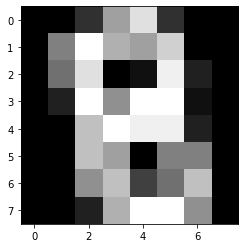

In [0]:
plt.gray()
plt.imshow(X[500,:].reshape(8, 8))

In [0]:
Y[500]

8

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

Простая модель

In [0]:
model = torch.nn.Sequential(
    torch.nn.Linear(64, 256), # 256 -- количество нейронов в линейном слое
    torch.nn.LeakyReLU(),
    torch.nn.Linear(256, 10)
)

In [0]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [0]:
loss = torch.nn.CrossEntropyLoss()

In [0]:
BATCH_SIZE = 8
loss_history = [] # ошибки после каждого прогона

for i in range(len(X_train) // BATCH_SIZE):
  X_batch = X_train[i * BATCH_SIZE : (i+1) * BATCH_SIZE]
  y_batch = y_train[i * BATCH_SIZE : (i+1) * BATCH_SIZE]

  # torch.tensor -- формат, понятный torch
  X_batch = torch.tensor(X_batch)
  y_batch = torch.tensor(y_batch)

  # прогоняем батч через нейронную сеть
  nn_output = model(X_batch.float()) # .float() -- чтобы без ошибки
  # функция ошибки
  computed_loss = loss(nn_output, y_batch)
  # добавим в историю ошибок
  loss_history.append(computed_loss.data.numpy())

  print('Step: ', str(i), ' -- loss is ', str(computed_loss.data.numpy()))

  # стандартные команды torch для обучения
  computed_loss.backward()
  optimizer.step()
  optimizer.zero_grad() # математическое условие сходимости к минимуму

Step:  0  -- loss is  3.5239873
Step:  1  -- loss is  3.021093
Step:  2  -- loss is  2.6210856
Step:  3  -- loss is  2.4946454
Step:  4  -- loss is  3.5632606
Step:  5  -- loss is  2.990694
Step:  6  -- loss is  3.2387648
Step:  7  -- loss is  2.9135842
Step:  8  -- loss is  1.8995981
Step:  9  -- loss is  1.7991363
Step:  10  -- loss is  2.3440814
Step:  11  -- loss is  1.6640636
Step:  12  -- loss is  1.9679308
Step:  13  -- loss is  1.2705148
Step:  14  -- loss is  2.0617085
Step:  15  -- loss is  1.6012833
Step:  16  -- loss is  1.1198379
Step:  17  -- loss is  1.1206726
Step:  18  -- loss is  1.3317882
Step:  19  -- loss is  1.3344475
Step:  20  -- loss is  1.7149563
Step:  21  -- loss is  0.47129136
Step:  22  -- loss is  1.3145236
Step:  23  -- loss is  0.9887889
Step:  24  -- loss is  1.0425347
Step:  25  -- loss is  0.77051467
Step:  26  -- loss is  0.8995127
Step:  27  -- loss is  0.9685884
Step:  28  -- loss is  0.62475824
Step:  29  -- loss is  0.8232967
Step:  30  -- loss 

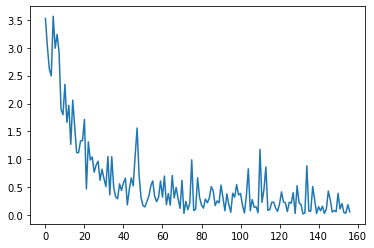

In [0]:
plt.plot(np.arange(len(loss_history)), loss_history)

In [0]:
# чтобы работал оптимизатор, вынесем слой отдельно
softmax = torch.nn.Softmax(dim=1)

output_probabilities = softmax(model(torch.tensor(X_test).float()))

In [0]:
output_probabilities

tensor([[4.3835e-04, 2.1487e-03, 4.7261e-05,  ..., 3.2925e-02, 1.2003e-03,
         9.3674e-03],
        [9.8549e-01, 4.3825e-06, 9.5769e-05,  ..., 1.0173e-05, 3.2988e-04,
         3.4269e-03],
        [2.9698e-04, 1.0949e-04, 2.7741e-05,  ..., 5.9389e-05, 9.1255e-01,
         2.6714e-02],
        ...,
        [2.2303e-06, 4.6325e-04, 4.3616e-04,  ..., 3.2583e-05, 4.8185e-04,
         1.6968e-04],
        [9.1133e-01, 8.8646e-07, 2.9195e-04,  ..., 2.7714e-04, 1.2371e-03,
         8.3205e-02],
        [6.1807e-03, 7.6112e-05, 3.1133e-04,  ..., 2.0478e-06, 1.7854e-03,
         2.1625e-05]], grad_fn=<SoftmaxBackward>)

In [0]:
output_probabilities[0]
# 4.3835e-04 = 4.3835 * 10^(-4)

tensor([4.3835e-04, 2.1487e-03, 4.7261e-05, 3.1478e-05, 9.3946e-01, 1.3712e-02,
        6.6663e-04, 3.2925e-02, 1.2003e-03, 9.3674e-03],
       grad_fn=<SelectBackward>)

In [0]:
output_probabilities[0] == max(output_probabilities[0])
# 9.3946e-01 = 9.3946 * 10^(-1) = 0.93946 = 93% -- вероятность того, что это цифра 9

tensor([False, False, False, False,  True, False, False, False, False, False])

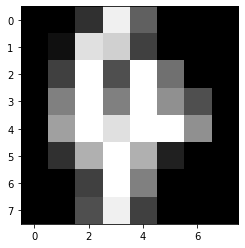

In [0]:
plt.imshow(X_test[0, :].reshape(8, 8))

In [0]:
y_test[0]

4

In [0]:
output_probabilities[43]

tensor([9.0621e-06, 3.7191e-03, 9.9076e-01, 1.4927e-03, 1.2317e-05, 2.0794e-03,
        1.2203e-04, 1.9881e-04, 1.3858e-03, 2.1618e-04],
       grad_fn=<SelectBackward>)

In [0]:
output_probabilities[43] == max(output_probabilities[43])

tensor([False, False,  True, False, False, False, False, False, False, False])

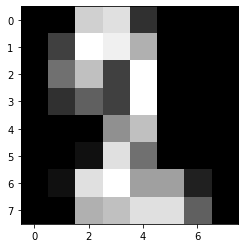

In [0]:
plt.imshow(X_test[43, :].reshape(8, 8))

In [0]:
y_test[43]

2

Более продвинутая модель

In [0]:
# в torch не реализован слой Flatten, напишем его сами
class Flatten(torch.nn.Module):
    # __call__ -- когда не создаём объект, а обращаемся к классу, как к функции
    def __call__(self, X):
      return X.reshape(X.shape[0], -1)

cool_model = torch.nn.Sequential(
    # kernel_size = размер фильтра
    # in_chanels = 1, так как ч/б
    # out_channels - число нейронов в следующем слое
    # stride - шаг, с которым фильтр перемещается по картинке
    torch.nn.Conv2d(kernel_size=3, in_channels=1, out_channels=64, stride=2),
    torch.nn.Sigmoid(),

    torch.nn.Conv2d(kernel_size=3, in_channels=64, out_channels=128, stride=2),
    torch.nn.ELU(),
    
    Flatten(),
    torch.nn.Linear(128, 10)
)

In [0]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss = torch.nn.CrossEntropyLoss()

In [0]:
BATCH_SIZE = 8
loss_history = [] # ошибки после каждой эпохи
n_epoch = 30

from sklearn.model_selection import train_test_split

X_train1, X_test, y_train1, y_test = train_test_split(X, Y, test_size = 0.3)

for epoch in range(n_epoch):
  
  perm = np.random.choice(len(X_train1), len(X_train1))
  X_train = X_train[perm]
  y_train = y_train[perm]
  
  for i in range(len(X_train) // BATCH_SIZE):
    X_batch = X_train[i * BATCH_SIZE : (i+1) * BATCH_SIZE]
    y_batch = y_train[i * BATCH_SIZE : (i+1) * BATCH_SIZE]

    # torch.tensor -- формат, понятный torch
    X_batch = torch.tensor(X_batch.reshape(BATCH_SIZE, 1, 8, 8))
    y_batch = torch.tensor(y_batch)

    # прогоняем батч через нейронную сеть
    nn_output = cool_model(X_batch.float()) # .float() -- чтобы без ошибки
    # функция ошибки
    computed_loss = loss(nn_output, y_batch)
    # добавим в историю ошибок
    loss_history.append(computed_loss.data.numpy())

    # стандартные команды torch для обучения
    computed_loss.backward()
    optimizer.step()
    optimizer.zero_grad() # математическое условие сходимости к минимуму

  print('Epoch: ', str(epoch), ' -- loss is ', str(computed_loss.data.numpy()))

Epoch:  0  -- loss is  2.224749
Epoch:  1  -- loss is  2.1065803
Epoch:  2  -- loss is  2.2252614
Epoch:  3  -- loss is  2.1614265
Epoch:  4  -- loss is  2.2001688
Epoch:  5  -- loss is  2.220571
Epoch:  6  -- loss is  2.296393
Epoch:  7  -- loss is  2.2425113
Epoch:  8  -- loss is  2.2183127
Epoch:  9  -- loss is  2.2582154
Epoch:  10  -- loss is  2.2181976
Epoch:  11  -- loss is  2.2637663
Epoch:  12  -- loss is  2.2070527
Epoch:  13  -- loss is  2.137125
Epoch:  14  -- loss is  2.2678418
Epoch:  15  -- loss is  2.234858
Epoch:  16  -- loss is  2.302447
Epoch:  17  -- loss is  2.1553507
Epoch:  18  -- loss is  2.2698052
Epoch:  19  -- loss is  2.1777039
Epoch:  20  -- loss is  2.1862955
Epoch:  21  -- loss is  2.2516043
Epoch:  22  -- loss is  2.277451
Epoch:  23  -- loss is  2.4773993
Epoch:  24  -- loss is  2.1630437
Epoch:  25  -- loss is  2.2398472
Epoch:  26  -- loss is  2.418833
Epoch:  27  -- loss is  2.2776315
Epoch:  28  -- loss is  2.2151093
Epoch:  29  -- loss is  2.263962

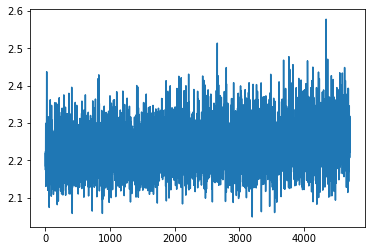

In [0]:
plt.plot(np.arange(len(loss_history)), loss_history)
# сеть не сошлась к минимуму, ошибка колеблется
# требуется изменить параметры задания сети

In [0]:
# чтобы работал оптимизатор, вынесем слой отдельно
softmax = torch.nn.Softmax(dim=1)

output_probabilities = softmax(cool_model(torch.tensor(X_test).float().reshape([-1, 1, 8, 8])))

In [0]:
output_probabilities[0] == max(output_probabilities[0])
# сеть утверждает, что это 1

tensor([ True, False, False, False, False, False, False, False, False, False])

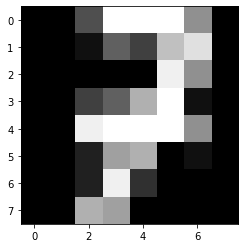

In [0]:
plt.imshow(X_test[0].reshape(8, 8))

In [0]:
y_test[0]
# но это 7

7